In [1]:
import numpy as np 
import pandas as pd
import os 
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import SelectFromModel

from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

In [2]:
def param_randomizedtune_pipline(model, X_train, X_test, y_train, y_test, param_grid, plot_flag = True):

    rs_clf = RandomizedSearchCV(model, 
    param_grid, 
    n_iter=10, 
    n_jobs = 8,
    cv = 10,
    scoring='median_absolute_error',
    refit = True, 
    random_state = 10086, verbose = 0)

    rs_clf.fit(X_train, y_train)

    score = rs_clf.best_score_
    param_recommend = rs_clf.best_params_

    train_pred = rs_clf.predict(X_train)
    train_pred = train_pred.reshape(y_train.shape)
    test_pred = rs_clf.predict(X_test)
    test_pred = test_pred.reshape(y_test.shape)

    print('Training Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(train_pred - y_train),y_train).mean()))
    print('Testing Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(test_pred - y_test),y_test).mean()))


    if plot_flag:
        plt.scatter(y_train, train_pred, color = 'blue', label = 'Train')
        plt.scatter(y_test, test_pred, color = 'red', label = 'Test')
        plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'black', linewidth = 2)
        plt.xlabel('Actual Ratio')
        plt.ylabel('Predicted Ratio')
        plt.legend()

    return rs_clf

def param_bayesiantune_pipline(model, param_range, X_train, X_test, y_train, y_test, init_points, n_iter):
    def cross_val_loss():
        return cross_val_score(model, X_train, y_train, cv = 10).median() 

    optimizer = BayesianOptimization(f = cross_val_loss,
                                    pbounds = param_range,
                                    random_state = 10086)
    optimizer.maximize(init_points, n_iter)

    param_recommend = optimizer.max()

    model_best = model(param_recommend)
    model_best.fit(X_train, y_train)

    train_pred = model_best.fit(X_train)
    test_pred = model_best.predict(X_test)

    print('Training Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(train_pred - y_train),y_train).mean()))
    print('Testing Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(test_pred - y_test),y_test).mean()))


    if plot_flag:
        plt.scatter(y_train, train_pred, color = 'blue', label = 'Train')
        plt.scatter(y_test, test_pred, color = 'red', label = 'Test')
        plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'black', linewidth = 2)
        plt.xlabel('Actual Median DS Inensity (g)')
        plt.ylabel('Predicted Median DS Intensity (g)')
        plt.legend()

    return model_best


In [3]:
param_grid = {'num_feature':[5,10,15,20],
'eta':[0.01,0.015,0.02,0.025,0.05,0.1,0.5,1.0],
'gamma':[0, 0.001,0.01,0.015,0.02,0.025,0.03,0.05,0.1,0.5],
'max_depth':[100,200,300,400,500,600,700,800,1000,2000],
'subsample':[0.1,0.2,0.3,0.4,0.5,0.8,1],
'lambda':[0,0.1,0.2,0.3,0.4,0.5,0.8,1.0],
'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.8,1.0]}

# Retrofitted Building Model

In [4]:
os.chdir(r'C:\Users\User\Desktop\MissingStrengthPercentage\Case2')
# Read in data
Retrofit_TrainTest_DesignMatrix = pd.read_csv(r'RetrofitRatioTrainTestMatrix.csv')
Retrofit_Edge_DesignMatrix = pd.read_csv(r'RetrofitRatioEdgeMatrix.csv')
# Retrofit_Verification_DesignMatrix = pd.read_csv(r'RetrofitRatioVerificationMatrix.csv')

Retrofit_TrainTestDSMedian_Ratio = pd.read_csv('DSMedianRatio_TrainTest.csv')
Retrofit_EdgeDSMedian_Ratio = pd.read_csv('DSMedianRatio_Edge.csv')
# Retrofit_VerificationDSMedian_Ratio = pd.read_csv('DSMedianRatio_Verification.csv')


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[11:14:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Median Absolute Error Ratio 7.78
Testing Median Absolute Error Ratio 9.84
[11:14:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None

XGBRegressor(alpha=0.3, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0.015,
       importance_type='gain', lambda=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=700, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_feature=20,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None, subsample=0.1,
       verbosity=1)

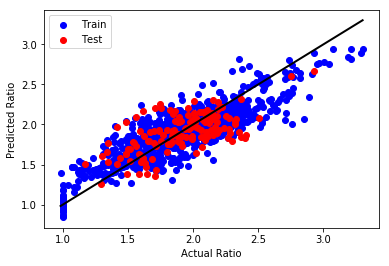

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(Retrofit_TrainTest_DesignMatrix.append(Retrofit_Verification_DesignMatrix), Retrofit_TrainTestDSMedian_Ratio.append(Retrofit_VerificationDSMedian_Ratio) ,test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(Retrofit_TrainTest_DesignMatrix, Retrofit_TrainTestDSMedian_Ratio,test_size = 0.1)

X_train = X_train.append(Retrofit_Edge_DesignMatrix)
y_train = y_train.append(Retrofit_EdgeDSMedian_Ratio)

reXGB_Slight = param_randomizedtune_pipline(XGBRegressor(), X_train, X_test, y_train.iloc[:,0], y_test.iloc[:,0], param_grid, plot_flag = True)
reXGB_Slight = XGBRegressor(**reXGB_Slight.best_params_)
reXGB_Slight.fit(X_train, y_train.iloc[:,0])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[11:14:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Median Absolute Error Ratio 5.04
Testing Median Absolute Error Ratio 9.81
[11:14:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None

XGBRegressor(alpha=0.4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
       importance_type='gain', lambda=0, learning_rate=0.1,
       max_delta_step=0, max_depth=500, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_feature=15,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None, subsample=0.2,
       verbosity=1)

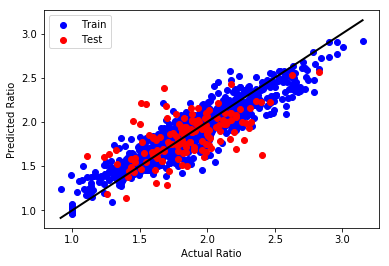

In [6]:
reXGB_Moderate = param_randomizedtune_pipline(XGBRegressor(), X_train, X_test, y_train.iloc[:,1], y_test.iloc[:,1], param_grid, plot_flag = True)
reXGB_Moderate = XGBRegressor(**reXGB_Moderate.best_params_)
reXGB_Moderate.fit(X_train, y_train.iloc[:,1])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[11:14:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Median Absolute Error Ratio 5.06
Testing Median Absolute Error Ratio 10.52
[11:14:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not Non

XGBRegressor(alpha=0.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.03,
       importance_type='gain', lambda=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=400, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_feature=20,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None, subsample=0.3,
       verbosity=1)

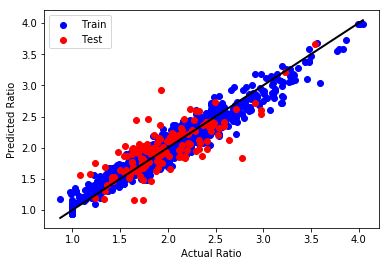

In [7]:
reXGB_Severe = param_randomizedtune_pipline(XGBRegressor(), X_train, X_test, y_train.iloc[:,2], y_test.iloc[:,2], param_grid, plot_flag = True)
reXGB_Severe = XGBRegressor(**reXGB_Severe.best_params_)
reXGB_Severe.fit(X_train, y_train.iloc[:,2])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[11:14:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Median Absolute Error Ratio 10.08
Testing Median Absolute Error Ratio 11.37
[11:14:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

XGBRegressor(alpha=0.3, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0.5,
       importance_type='gain', lambda=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=100, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_feature=15,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None, subsample=0.2,
       verbosity=1)

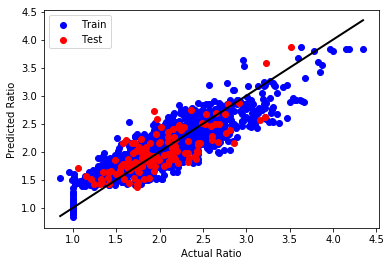

In [8]:
reXGB_Complete = param_randomizedtune_pipline(XGBRegressor(), X_train, X_test, y_train.iloc[:,3], y_test.iloc[:,3], param_grid, plot_flag = True)
reXGB_Complete = XGBRegressor(**reXGB_Complete.best_params_)
reXGB_Complete.fit(X_train, y_train.iloc[:,3])

In [10]:
import pickle
os.chdir(r'C:\Users\User\Desktop\MissingStrengthPercentage\Case2\Models')
with open('Retrof_Slight_Ratio.pkl', 'wb') as file:
    pickle.dump(reXGB_Slight, file)
with open('Retrof_Moderate_Ratio.pkl', 'wb') as file:
    pickle.dump(reXGB_Moderate, file)
with open('Retrof_Severe_Ratio.pkl', 'wb') as file:
    pickle.dump(reXGB_Severe, file)
with open('Retrof_Complete_Ratio.pkl', 'wb') as file:
    pickle.dump(reXGB_Complete, file)